In [1]:
# loading basic python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the train dataset

#picking the file to read from the drive 
drive_url = 'https://drive.google.com/file/d/1s7FjimMQUtyr4FXVPA9c1gpMDgLlHF_N/view?usp=sharing' #Read the Excel Sheet, which contains 4000 House properties scraped from zolo.ca.
new_url = 'https://drive.google.com/uc?export=download&id=' + drive_url.split('/')[-2] #Save into temporary location

# reading csv file 
data = pd.read_csv(new_url)

# first 5 samples from dataset
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- There are no null values. So we don't need any imputation

# EDA

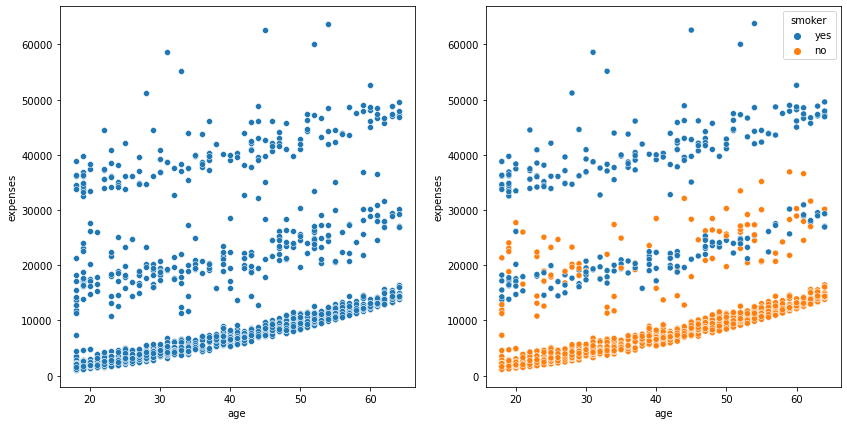

In [5]:
# for plotting multiple graph in a figure(subplots)
fig,ax = plt.subplots(1,2,figsize=(14,7))

# Graph between age and expenses
sns.scatterplot(x='age',y='expenses',data=data,ax=ax[0])
# Graph between age and expenses looking at smoker
sns.scatterplot(x='age',y='expenses',hue='smoker',data=data,ax=ax[1])

- It is clearly visible that one who doesn't smoke has less expenses.

In [6]:
# lets check whether sex of a person is important factor behind the insurance price
data.groupby(['sex']).describe()['expenses']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578897,11128.703817,1607.51,4885.1625,9412.965,14454.690,63770.43
male,676.0,13956.751420,12971.025897,1121.87,4619.1350,9369.615,18989.595,62592.87


- Data don't suggest any differnce on expenses due to sex.

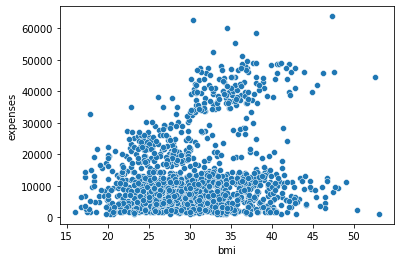

In [7]:
# Exploring effect of bmi on expenses
sns.scatterplot(x='bmi',y='expenses',data=data)

- There is no clear relationship between bmi and expenses.

In [8]:
# Exploring effect of children on expenses
data.groupby(['children']).describe()['expenses']

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975767,12023.294017,1121.87,2734.4200,9856.950,14440.1200,63770.43
1,324.0,12731.171821,11823.631341,1711.03,4791.6450,8483.870,15632.0475,58571.07
2,240.0,15073.564000,12891.368314,2304.00,6284.9375,9264.980,20379.2750,49577.66
3,157.0,15355.318535,12330.869474,3443.06,6652.5300,10600.550,19199.9400,60021.40
4,25.0,13850.656800,9139.223594,4504.66,7512.2700,11033.660,17128.4300,40182.25
5,18.0,8786.035556,3808.434648,4687.80,5874.9750,8589.565,10019.9450,19023.26


- 0-2 childrens has almost same expense.
- 3 or 4 children has little bit high expenses.
- 5 children has almost lowest expense.

In [9]:
# Exploring effect of region on expenses
data.groupby(['region']).describe()['expenses']

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384691,11255.802916,1694.80,5194.3225,10057.655,16687.3650,58571.07
northwest,325.0,12417.575169,11072.276880,1621.34,4719.7400,8965.800,14711.7400,60021.40
southeast,364.0,14735.411538,13971.098797,1121.87,4440.8850,9294.130,19526.2875,63770.43
southwest,325.0,12346.937908,11557.179033,1241.57,4751.0700,8798.590,13462.5200,52590.83


- No specific region has quite significant effect on expenses. 

In [10]:
# let's explore expenses of people who is smoker
data_y = data[data['smoker']=='yes']

In [11]:
# Effect of sex of people on the expenses
data_y.groupby(['sex']).describe()['expenses']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,115.0,30678.996261,11907.536840,13844.51,19696.43,28950.47,40918.315,63770.43
male,159.0,33042.006226,11202.670775,12829.46,21241.53,36085.22,41797.590,62592.87


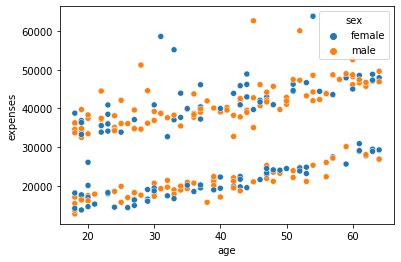

In [12]:
sns.scatterplot(x='age',y='expenses',hue='sex',data=data_y)

- smoker male has little higher expenses compared to smoker female

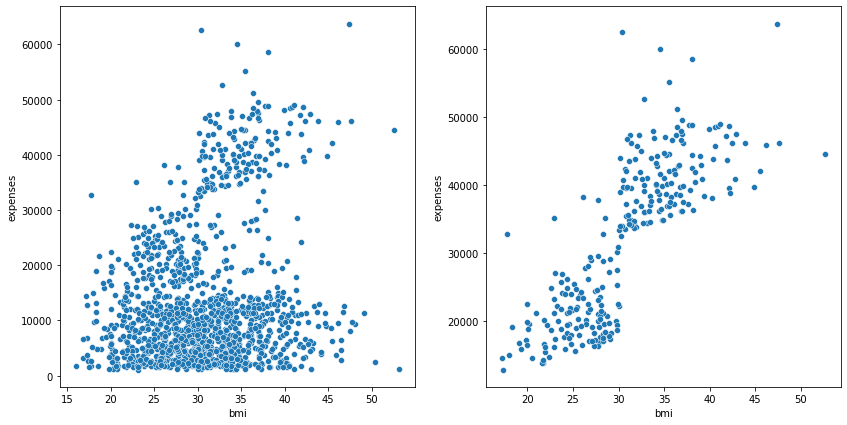

In [13]:
# making subplots
fig,ax = plt.subplots(1,2,figsize=(14,7))

# bmi vs expenses graph of the original data
sns.scatterplot(x='bmi',y='expenses',data=data,ax=ax[0])
# bmi vs expenses graph of the only yes instances
sns.scatterplot(x='bmi',y='expenses',data=data_y,ax=ax[1])

- data with yes instance expenses increases with increase in bmi

In [14]:
# Exploring whether number of childrens makes any difference in yes instances
data_y.groupby(['children']).describe()['expenses']

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,115.0,31341.364087,11596.678825,13747.87,20057.035,33900.65,39202.225,63770.43
1,61.0,31822.654098,11813.014003,15359.10,20773.630,34806.47,41034.220,58571.07
2,55.0,33844.236182,11311.748555,12829.46,22179.710,38344.57,43855.125,49577.66
3,39.0,32724.915385,11412.853954,16420.49,22883.420,32787.46,41445.265,60021.40
4,3.0,26532.280000,11952.285925,17942.11,19707.295,21472.48,30827.365,40182.25
5,1.0,19023.260000,NaN,19023.26,19023.260,19023.26,19023.260,19023.26


- There is no effect of number of children on the expenses.

In [15]:
# Exploring whether region makes any difference in yes instances
data_y.groupby(['region']).describe()['expenses']

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,67.0,29673.536269,11589.560007,12829.46,19881.400,28101.330,39576.9500,58571.07
northwest,58.0,30192.002759,11413.827813,14711.74,20834.130,27488.995,39918.9525,60021.40
southeast,91.0,34844.997253,11324.766716,16577.78,23155.105,37484.450,43391.8600,63770.43
southwest,58.0,32269.064138,11270.279405,13844.51,20396.045,35165.255,39809.2925,52590.83


- There is no effect of region on the expenses.

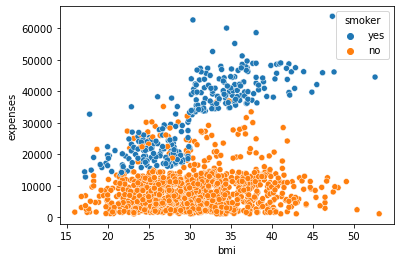

In [16]:
sns.scatterplot(x='bmi',y='expenses',hue='smoker',data=data)

- if person is not smoker than most people has expense less than 15000.
- if person is smoker than minimu expense start from around 15000, and increases with increase in bmi of person.

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [18]:
# encoding sex categorical variable
data['sex'] = data['sex'].map({'female':0,'male':1})

In [19]:
# encoding smoker categorical variable
data['smoker'] = data['smoker'].map({'no':0,'yes':1})

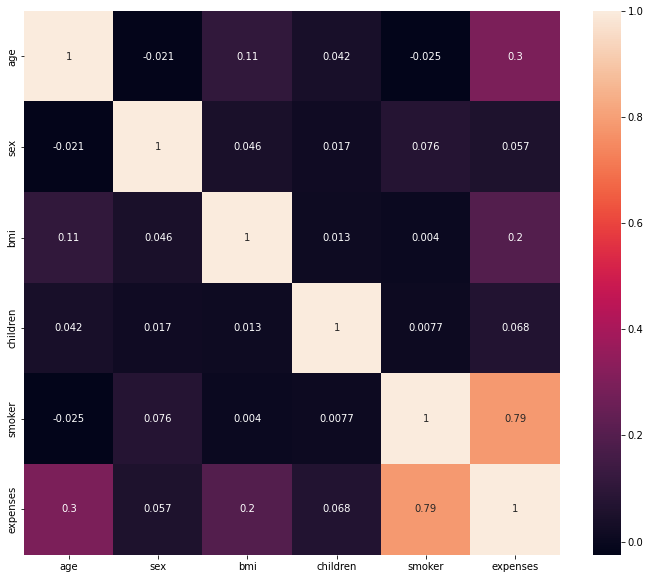

In [20]:
# Plotting correlation between numerical features and target variable
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(),annot=True)

- smoker variable is highly correlated with the target variable, and variable age and bmi is also significantly correlated with the expenses.

# Modelling

In [21]:
# Features and target varible
X = data[['age','bmi','smoker']]
y = data['expenses']

In [22]:
# Splitting the dataset into train and validation set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
from sklearn import metrics

# this function takes model instance, train and test data. And returns the prediction and metrics
def train_and_predict(reg,X_train,y_train,X_test,y_test):
  reg.fit(X_train,y_train)
  y_pred = reg.predict(X_test)
  mse = metrics.mean_squared_error(y_pred,y_test)
  score = reg.score(X_test,y_test)
  return mse,y_pred,score

In [26]:
# Trying first algorithm Linear regression to see how well it performs
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
mse,y_pred,score = train_and_predict(lr_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score}')

mean square error is 35868210.93391996 
and accuracy score is 0.7622908080118507


In [27]:
# Trying another algorithm Knn
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
mse,y_pred,score = train_and_predict(knn_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score}')

mean square error is 23912428.25677832 
and accuracy score is 0.8415252991049545


In [28]:
# Trying another algorithm Support vector regression
from sklearn.svm import SVR

svr_reg = SVR()
mse,y_pred,score = train_and_predict(svr_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score}')

mean square error is 163949772.69217044 
and accuracy score is -0.08654340371465441


In [29]:
# Trying another algorithm decision tree
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
mse,y_pred,score = train_and_predict(dt_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score}')

mean square error is 37630081.258326195 
and accuracy score is 0.7506143747497044


# Ensemble models

In [30]:
# Trying random forestRegressor model
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
mse,y_pred,score = train_and_predict(rf_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

mean square error is 27891338.379706573 
and accuracy score is 0.8151558904924862 


In [31]:
# Checking importance of each feature used 
rf_reg.feature_importances_

array([0.14526388, 0.24290188, 0.61183424])

In [32]:
# Trying AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

adr_reg = AdaBoostRegressor()
mse,y_pred,score = train_and_predict(adr_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

mean square error is 27333254.09996503 
and accuracy score is 0.8188544792914383 


In [33]:
# Trying GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbrt_reg = GradientBoostingRegressor()
mse,y_pred,score = train_and_predict(gbrt_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

mean square error is 21751847.069392566 
and accuracy score is 0.8558441066201788 


In [34]:
# Trying xgboost
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
mse,y_pred,score = train_and_predict(xgb_reg,X_train,y_train,X_test,y_test)
print(f'mean square error is {mse} \nand accuracy score is {score} ')

[01:18:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mean square error is 21849814.28164108 
and accuracy score is 0.8551948490670818 


In [35]:
# performing cross-validation on best performing model to check for the overfitting
from sklearn.model_selection import cross_val_score

rf_reg = RandomForestRegressor()
scores = cross_val_score(rf_reg,X,y,cv=4)
print(f'scores of cross validation is {scores}')

scores of cross validation is [0.83366075 0.77971345 0.83003961 0.80605251]
